# Multinomial logistic regression
#### 1. Importing libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
from opendatasets import download
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#### 2. Download and prepare data

In [5]:
download("https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading dry-bean-dataset.zip to ./dry-bean-dataset


100%|██████████| 1.01M/1.01M [00:00<00:00, 1.94MB/s]

In [14]:
bean_rawdf = pd.read_csv("./data/dry-bean-dataset/Dry_Bean.csv", header=0, sep=",")
bean_rawdf.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


#### `Attribute Information:`

* Area (A): The area of a bean zone and the number of pixels within its boundaries.

* Perimeter (P): Bean circumference is defined as the length of its border.

* Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

* Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

* Aspect ratio (K): Defines the relationship between L and l.

* Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

* Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

* Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

* Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

* Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

* Roundness (R): Calculated with the following formula: $(4\pi A)/(P^2)$

* Compactness (CO): Measures the roundness of an object: Ed/L

* ShapeFactor1 (SF1)
* ShapeFactor2 (SF2)
* ShapeFactor3 (SF3)
* ShapeFactor4 (SF4)
* Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [15]:
bean_rawdf["Class"].unique() # Multiclass.

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [16]:
bean_rawdf.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


#### 3. Dropping duplicates and missing values

In [17]:
bean_rawdf.drop_duplicates(inplace=True)

In [18]:
bean_rawdf.isnull().sum() # No missing values 😁

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### 4. Undersampling

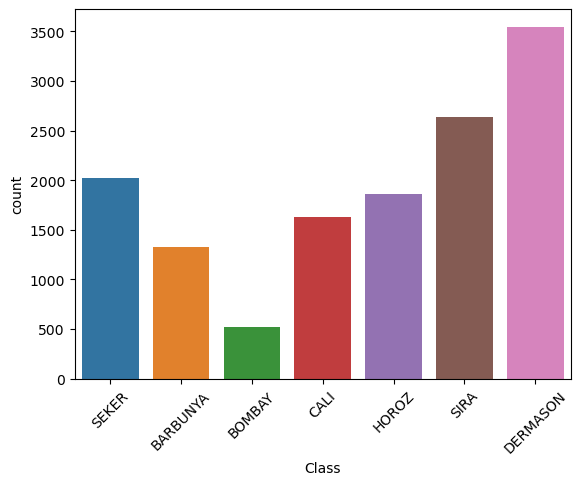

In [22]:
sns.countplot(data=bean_rawdf, x="Class")
plt.xticks(rotation=45)
plt.show()

Data is not balanced, our regressor is more prone to learn about more populated classes. There are some approaches to get a balance:

1. Normalize respect to lowest count class (⚠️Loss information!), a.k.a _oversampling_
2. Normalize respect to highest count class (⚠️Non precise info for those created values) a.k.a _undersampling_

In [24]:
from imblearn.under_sampling import RandomUnderSample
undersample = RandomUnderSample(random_state=42)

ImportError: cannot import name 'RandomUnderSample' from 'imblearn.under_sampling' (/home/fenilenvinileno97/miniconda3/envs/missing_values/lib/python3.9/site-packages/imblearn/under_sampling/__init__.py)